# Convolutional Sentiment Classifier

We are going to classify IMDB reviews by their sentiment with a *ConvNet*

#### Load dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, SpatialDropout1D, GlobalMaxPooling1D
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Set hyperparameters

In [12]:
output_dir = 'model_output/conv'

epochs = 4
batch_size =128

n_dim = 64
n_unique_words= 5000
n_words_to_skip = 50
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_dense = 256
dropout = 0.25

n_conv = 256
k_conv = 5

#### Load data

In [13]:
(x_train, y_train) , (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

#### Preprocess data

In [14]:
x_train_1 = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, 
                        truncating=trunc_type,value=0)
x_valid_1 = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, 
                        truncating=trunc_type,value=0)

In [15]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 396, 256)          82176     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total para

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_checkpoint =  ModelCheckpoint(filepath=output_dir+"weights.{epoch:02d}.hdf5")

In [19]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [20]:
model.fit(x_train_1, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid_1,y_valid), callbacks=[model_checkpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 170s 7ms/step - loss: 0.5004 - acc: 0.7328 - val_loss: 0.3027 - val_acc: 0.8709
Epoch 2/4
25000/25000 [==============================] - 173s 7ms/step - loss: 0.2492 - acc: 0.8993 - val_loss: 0.2590 - val_acc: 0.8938
Epoch 3/4
25000/25000 [==============================] - 179s 7ms/step - loss: 0.1609 - acc: 0.9402 - val_loss: 0.2637 - val_acc: 0.8962
Epoch 4/4
25000/25000 [==============================] - 192s 8ms/step - loss: 0.1013 - acc: 0.9666 - val_loss: 0.2869 - val_acc: 0.8959


#### Evaluate

In [22]:
model.load_weights(output_dir+'weights.02.hdf5')

In [23]:
y_hat = model.predict_proba(x_valid_1)

In [24]:
y_hat[0]

array([0.03485495], dtype=float32)

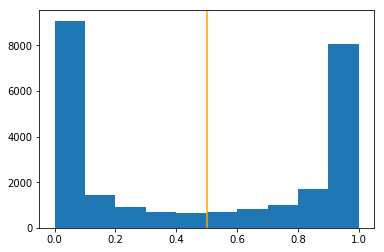

In [25]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [26]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [27]:
"{:0.2f}".format(pct_auc)

'95.96'